## Implementing Neural Network from Scratch using Numpy

This notebook contains following sections.

1. Load input data.
2. Initializing weights and bias.
3. Activation Functions.
4. Feed forward propagation.
5. Cost calculation.
6. Back propagation.
7. Update parameters.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 1. Load Input Data

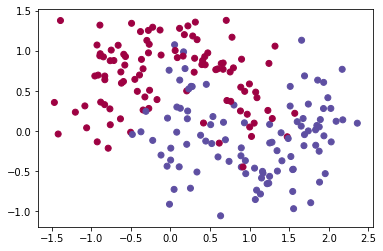

In [75]:
X, y = datasets.make_moons(200, noise=0.30, random_state=8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [76]:
print('shape of input is', X.shape)

shape of input is (200, 2)


In [77]:
X = np.reshape(X, (2, 200))
y = np.reshape(y, (1, 200))

In [78]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([100, 100], dtype=int64))

### 2. Initializing Parameters

Now that the data is ready, parameters (weights, bias) should be initialized for training neural network model. Before that the neural network architecture has to be defined.

For simplicity the architecture will consist of just one hidden layer with 5 hidden units.

In [79]:
def init_params(X, Y, h):
    xdim = X.shape[0]
    hdim = h
    ydim = Y.shape[0]
    
    '''
    initialize weights randomly
    reduce weight value so that the training isn't slow
    '''
    np.random.seed(0)    
    W1 = np.random.randn(hdim, xdim) * 0.01
    b1 = np.zeros((hdim,1))
    W2 = np.random.randn(ydim, hdim) * 0.01
    b2 = np.zeros((ydim, 1))
    
    parameters = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
    
    print('shape of W1 and W2 is', W1.shape, W2.shape, 'respectively')
    print('shape of b1 and b2 is', b1.shape, b2.shape, 'respectively')
    
    return parameters

#parameters = init_params(X, y)

### 3. Activation Functions

Here we define activation functions. Trying both `sigmoid` and `relu` functions at hidden layer to check the performance and output layer will have `sigmoid` function.

Also the derivatives of these activation functions are defined which will be used during back propagation.

In [80]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def relu(z):
    a = np.maximum(z)
    
    return a

def sigmoid_back(da, z):
        
    return sigmoid(z) * (1 - sigmoid(z))

def relu_back(da, z):
    dz = np.array(da)
    #when z <= 0 then derivative is set to 0
    dz[z <= 0] = 0
    
    return dz

### 4. Forward Propagation

In [81]:
def forward_prop(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    z1 = np.dot(W1, X) + b1
#     if activation == 'sigmoid':
#         a1 = sigmoid(z1)
#     elif activation == 'relu':
#         a1 = relu(z1)
    a1 = np.tanh(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    utils = {'z1':z1,
            'z2':z2,
            'a1':a1,
            'a2':a2}
#     print("z1 shape after forward:", z1.shape)
#     print("a1 shape after forward:", a1.shape)
#     print("z2 shape after forward:", z2.shape)
#     print("a2 shape after forward:", a2.shape)
    
    return a2, utils
     

In [82]:
def cost_function(y_hat, y):
    m = y.shape[1]
    cost = -1/m * (np.sum(y * np.log(y_hat) + ((1-y) * np.log(1-y_hat))))
    cost = float(np.squeeze(cost))
    
    return cost

In [83]:
def back_prop(X, y, parameters, utils):
    m = X.shape[1]
    
    a2 = utils['a2']
    a1 = utils['a1']
    z1 = utils['z1']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    dZ2 = a2 - y
    dW2 = 1/m * np.dot(dZ2, a1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims= True)
#     if activation == 'sigmoid':
#         dZ1 = np.dot(W2.T, dZ2) * sigmoid(z1)
#     elif activation == 'relu':
#         dZ1 = relu_back(np.dot(W2.T, dZ2), z1)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(a1,2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims= True)
    
    gradients = {'dW2':dW2,
                'dW1':dW1,
                'db1':db1,
                'db2':db2}
#     print("dz2 shape:", dZ2.shape)
#     print("dw2 shape:", dW2.shape)
#     print("dz1 shape:", dZ1.shape)
#     print("dw1 shape:", dW1.shape)
    
    return gradients


In [84]:
def update_params(parameters, gradients, lr):
    
    W1 = parameters['W1'] - (lr * gradients['dW1'])
    b1 = parameters['b1'] - (lr * gradients['db1'])
    W2 = parameters['W2'] - (lr * gradients['dW2'])
    b2 = parameters['b2'] - (lr * gradients['db2'])
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [85]:
def nn_model(X, y, h, epochs, print_cost=True):
    
    parameters = init_params(X, y, h)
    
    for i in range(0, epochs):
        y_hat, utils = forward_prop(X, parameters)
        cost = cost_function(y_hat, y)
        gradients = back_prop(X, y, parameters, utils)
        parameters = update_params(parameters, gradients, lr=1.5)
        
        if print_cost and i%1000 == 0:
            print("cost at iteration %i is %f" %(i,cost))
    
    return parameters

In [86]:
def predict(parameters, X):
    y_hat, utils = forward_prop(X, parameters)
    preds = (y_hat > 0.5)
    
    return preds

In [102]:
def plot_decision_boundary(model, X, y):
    print(X.shape)
    print(y.shape)
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     print(x_max)
#     print(xx.shape)
#     print(yy.shape)
#     print(yy.ravel().shape)
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y[0,:], cmap=plt.cm.Spectral)
    

shape of W1 and W2 is (5, 2) (1, 5) respectively
shape of b1 and b2 is (5, 1) (1, 1) respectively
cost at iteration 0 is 0.693155
cost at iteration 1000 is 0.661898
cost at iteration 2000 is 0.647799
cost at iteration 3000 is 0.641229
cost at iteration 4000 is 0.632243
cost at iteration 5000 is 0.630057
cost at iteration 6000 is 0.629615
cost at iteration 7000 is 0.629475
cost at iteration 8000 is 0.629405
cost at iteration 9000 is 0.629355
cost at iteration 10000 is 0.629311
cost at iteration 11000 is 0.629268
cost at iteration 12000 is 0.629226
cost at iteration 13000 is 0.629184
cost at iteration 14000 is 0.629143
cost at iteration 15000 is 0.629102
cost at iteration 16000 is 0.629060
cost at iteration 17000 is 0.629020
cost at iteration 18000 is 0.628980
cost at iteration 19000 is 0.628940
(2, 200)
(1, 200)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 5')

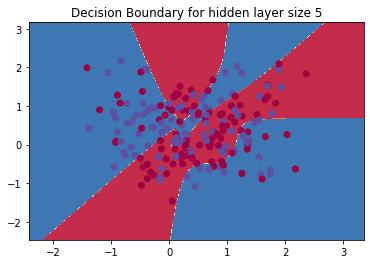

In [103]:
parameters = nn_model(X, y, h=5, epochs=20000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(5))

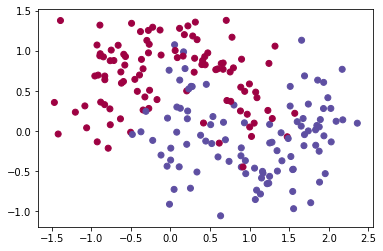

In [68]:
X, y = datasets.make_moons(200, noise=0.30, random_state=8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [57]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100) + '%')

Accuracy: 62%
